# Dogs Vs Cats Classifier using CNN and Image Augmentation

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.model_selection import train_test_split

In [2]:
TRAIN_DIR = r'C:\Users\Julian\Desktop\dogs-vs-cats\train\train'
TEST_DIR = r'C:\Users\Julian\Desktop\dogs-vs-cats\test\test'
IMG_WIDTH = 200
IMG_HEIGHT = 200
IMG_SIZE = (IMG_WIDTH, IMG_HEIGHT)
BATCH_SIZE = 100

In [3]:
path = TRAIN_DIR
filenames = os.listdir(path)
dog_or_cat = []
for file in filenames:
    category = file.split('.')[0]
    if category == 'dog':
        dog_or_cat.append('dog')
    else:
        dog_or_cat.append('cat')

df = pd.DataFrame({
    'sample': filenames,
    'category': dog_or_cat
})

In [4]:
df.head()

sample category
0     cat.0.jpg      cat
1     cat.1.jpg      cat
2    cat.10.jpg      cat
3   cat.100.jpg      cat
4  cat.1000.jpg      cat

In [5]:
df.tail()

sample category
24995  dog.9995.jpg      dog
24996  dog.9996.jpg      dog
24997  dog.9997.jpg      dog
24998  dog.9998.jpg      dog
24999  dog.9999.jpg      dog

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sample    25000 non-null  object
 1   category  25000 non-null  object
dtypes: object(2)
memory usage: 390.8+ KB


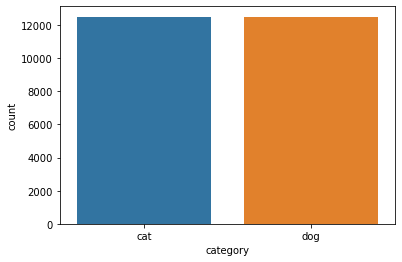

In [7]:
sns.countplot(x=df['category'])

In [8]:
train_df, val_df = train_test_split(df, test_size=0.3, random_state=17)

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17500 entries, 23219 to 10863
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sample    17500 non-null  object
 1   category  17500 non-null  object
dtypes: object(2)
memory usage: 410.2+ KB


In [10]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7500 entries, 7167 to 19175
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sample    7500 non-null   object
 1   category  7500 non-null   object
dtypes: object(2)
memory usage: 175.8+ KB


In [11]:
#LOCAL PATH
folder = 'train/train/'

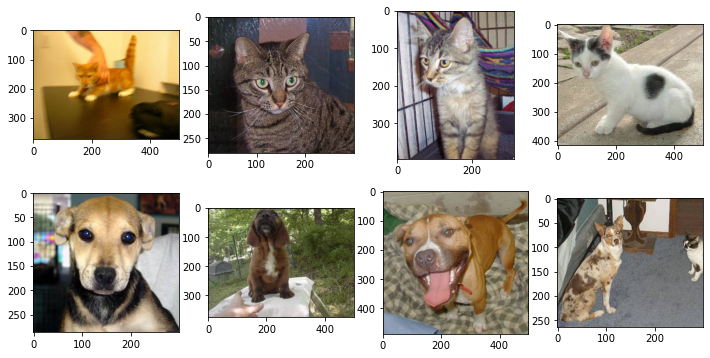

In [12]:
plt.figure(figsize=(12,6))
for i in range(8):
    if i < 4:
        plt.subplot(2,4,i+1)
        image = load_img(folder + 'cat.' + str(i) + '.jpg')
        plt.imshow(image)
    else:
        plt.subplot(2,4,i+1)
        image = load_img(folder + 'dog.' + str(i) + '.jpg')
        plt.imshow(image)

In [13]:
pic = load_img(folder + 'dog.100.jpg')
pic.getpixel

<bound method Image.getpixel of <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x397 at 0x2267FABFA60>>

In [14]:
pic_array = img_to_array(pic)
pic_array.shape

(397, 500, 3)

In [15]:
pic_array = pic_array.reshape((1,) + pic_array.shape)
pic_array.shape

(1, 397, 500, 3)

In [16]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.7, 1.2],
    rescale=1./255,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [17]:
augmented_pics = datagen.flow(pic_array, batch_size=1)

In [18]:
augmented_image = next(augmented_pics)
augmented_image.shape

(1, 397, 500, 3)

In [19]:
augmented_image = np.squeeze(augmented_image)
augmented_image.shape

(397, 500, 3)

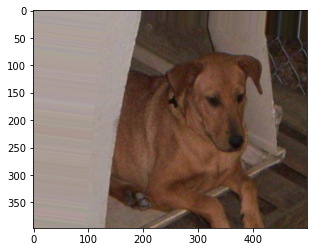

In [20]:
plt.imshow(augmented_image)

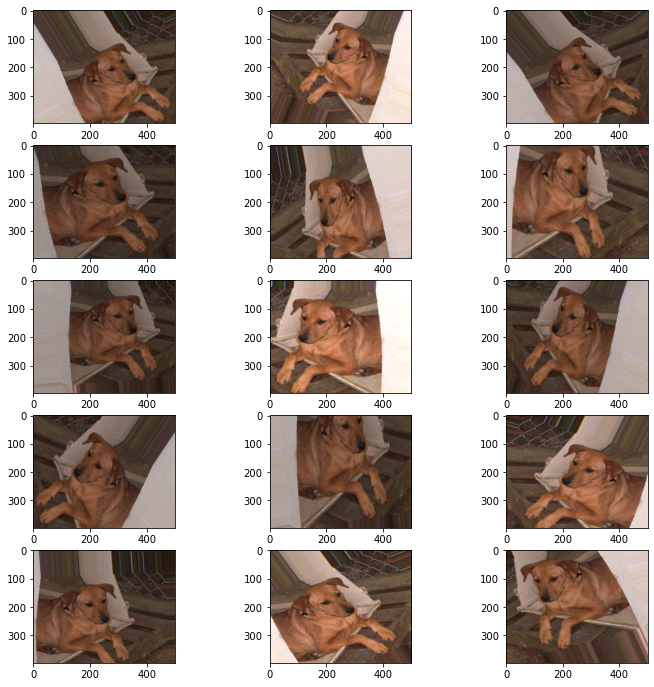

In [21]:
plt.figure(figsize=(12,12))
for i in range(15):
    plt.subplot(5, 3, i+1)
    augmented_image = next(augmented_pics)
    augmented_image = np.squeeze(augmented_image)
    plt.imshow(augmented_image)

In [22]:
train_data_gen = datagen.flow_from_dataframe(dataframe=train_df, directory=path, x_col='sample', y_col='category',
                                             class_mode='categorical', target_size=IMG_SIZE, batch_size=BATCH_SIZE,
                                             rescale=1./255, seed=17)

Found 17500 validated image filenames belonging to 2 classes.


In [23]:
validation_datagen = ImageDataGenerator(rescale=1./255)
val_data_gen = datagen.flow_from_dataframe(dataframe=val_df, directory=path, x_col='sample', y_col='category',
                                             class_mode='categorical', target_size=IMG_SIZE, batch_size=BATCH_SIZE,
                                             rescale=1./255, seed=17)

Found 7500 validated image filenames belonging to 2 classes.


In [24]:
train_data_gen[0][0].shape

(100, 200, 200, 3)

In [25]:
train_data_gen[0][0][0].shape

(200, 200, 3)

In [26]:
augmented_images = [train_data_gen[0][0][0] for i in range(15)]

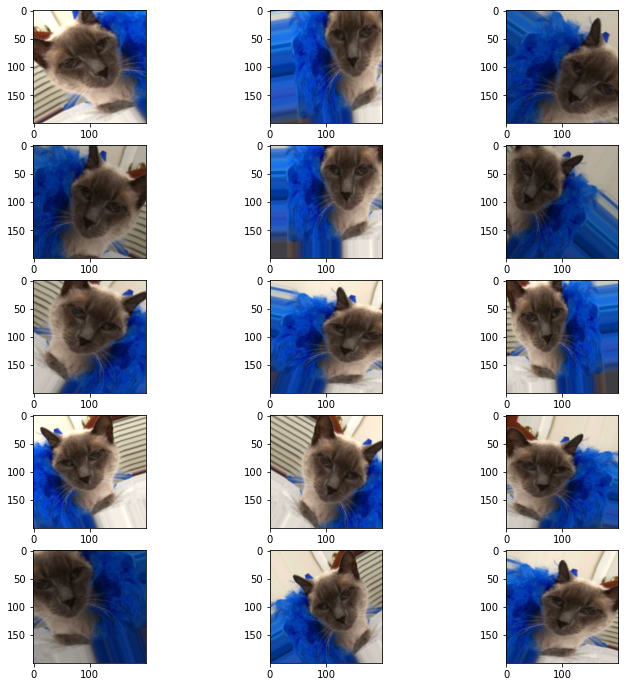

In [27]:
plt.figure(figsize=(12,12))
for i in range(15):
    plt.subplot(5, 3, i+1)
    augmented_image = augmented_images[i]
    plt.imshow(augmented_image)

# MODEL BUILDING!

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, BatchNormalization

In [247]:
# BASE MODEL
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(IMG_WIDTH,IMG_HEIGHT,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',
	optimizer='adam',metrics=['accuracy'])

In [248]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 23, 23, 128)       0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 67712)            

In [36]:
total_train = train_df.shape[0]

In [37]:
total_val = val_df.shape[0]

In [257]:
epochs = 3
history = model.fit_generator(
	train_data_gen,
	epochs=epochs,
	steps_per_epoch=total_train//BATCH_SIZE,
	validation_data=val_data_gen,
	validation_steps=total_val//BATCH_SIZE)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/3
175/175 [==============================] - 589s 3s/step - loss: 0.6720 - accuracy: 0.5925 - val_loss: 0.6078 - val_accuracy: 0.6724
Epoch 2/3
175/175 [==============================] - 459s 3s/step - loss: 0.6039 - accuracy: 0.6705 - val_loss: 0.6168 - val_accuracy: 0.6515
Epoch 3/3
175/175 [==============================] - 458s 3s/step - loss: 0.5635 - accuracy: 0.7122 - val_loss: 0.5351 - val_accuracy: 0.7337


In [152]:
# Improved model
model2 = Sequential()

model2.add(Conv2D(32, (3,3), activation='relu', input_shape=(IMG_WIDTH,IMG_HEIGHT,3)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(64, (3,3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(128, (3,3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.5))

model2.add(Flatten())
model2.add(Dense(512,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(2,activation='softmax'))

model2.compile(loss='categorical_crossentropy',
	optimizer='adam',metrics=['accuracy'])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
batch_normalization_8 (Batch (None, 198, 198, 32)      128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
batch_normalization_9 (Batch (None, 97, 97, 64)        256       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 46, 46, 128)      

In [300]:
epochs = 3
history = model2.fit_generator(
	train_data_gen,
	epochs=epochs,
	steps_per_epoch=total_train//BATCH_SIZE,
	validation_data=val_data_gen,
	validation_steps=total_val//BATCH_SIZE)

Epoch 1/3
175/175 [==============================] - 905s 5s/step - loss: 0.8723 - accuracy: 0.6079 - val_loss: 0.8342 - val_accuracy: 0.5095
Epoch 2/3
175/175 [==============================] - 941s 5s/step - loss: 0.6087 - accuracy: 0.6781 - val_loss: 1.0965 - val_accuracy: 0.5159
Epoch 3/3
175/175 [==============================] - 920s 5s/step - loss: 0.5566 - accuracy: 0.7150 - val_loss: 1.3726 - val_accuracy: 0.5520


In [153]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.00001)
callbacks = [earlystop,learning_rate_reduction]

In [154]:
epochs = 10
history = model2.fit_generator(
	train_data_gen,
	epochs=epochs,
	steps_per_epoch=total_train//BATCH_SIZE,
	validation_data=val_data_gen,
	validation_steps=total_val//BATCH_SIZE,callbacks=callbacks)

Epoch 1/10
175/175 [==============================] - 1417s 8s/step - loss: 0.8842 - accuracy: 0.6187 - val_loss: 1.6049 - val_accuracy: 0.5095
Epoch 2/10
175/175 [==============================] - 1329s 8s/step - loss: 0.6131 - accuracy: 0.6835 - val_loss: 0.7642 - val_accuracy: 0.5257
Epoch 3/10
175/175 [==============================] - 1306s 7s/step - loss: 0.5509 - accuracy: 0.7181 - val_loss: 1.0528 - val_accuracy: 0.5575
Epoch 4/10
175/175 [==============================] - 1270s 7s/step - loss: 0.5236 - accuracy: 0.7364 - val_loss: 0.5675 - val_accuracy: 0.7055
Epoch 5/10
175/175 [==============================] - 1272s 7s/step - loss: 0.5086 - accuracy: 0.7506 - val_loss: 0.5217 - val_accuracy: 0.7408
Epoch 6/10
175/175 [==============================] - 1346s 8s/step - loss: 0.4805 - accuracy: 0.7693 - val_loss: 0.4891 - val_accuracy: 0.7607
Epoch 7/10
175/175 [==============================] - 1311s 7s/step - loss: 0.4675 - accuracy: 0.7777 - val_loss: 0.4650 - val_accuracy:

In [155]:
model.save("model_dogsvscats_3epochs.h5")
model2.save("model2_dogsvscats_10epochs.h5")

In [34]:
# Added an extra Conv2D layer
model3 = Sequential()

model3.add(Conv2D(32, (3,3), activation='relu', input_shape=(IMG_WIDTH,IMG_HEIGHT,3)))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(64, (3,3), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(128, (3,3), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(128, (3,3), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.5))

model3.add(Flatten())
model3.add(Dense(512,activation='relu'))
model3.add(Dense(2,activation='softmax'))

model3.compile(loss='categorical_crossentropy',
	optimizer='adam',metrics=['accuracy'])

model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 198, 198, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 97, 97, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0

In [40]:
epochs = 10
history = model3.fit_generator(
	train_data_gen,
	epochs=epochs,
	steps_per_epoch=total_train//BATCH_SIZE,
	validation_data=val_data_gen,
	validation_steps=total_val//BATCH_SIZE,callbacks=callbacks)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
175/175 [==============================] - 1000s 6s/step - loss: 0.9124 - accuracy: 0.5917 - val_loss: 0.7063 - val_accuracy: 0.5152
Epoch 2/10
175/175 [==============================] - 953s 5s/step - loss: 0.6058 - accuracy: 0.6610 - val_loss: 1.0315 - val_accuracy: 0.5151
Epoch 3/10
175/175 [==============================] - 947s 5s/step - loss: 0.5718 - accuracy: 0.7004 - val_loss: 1.0742 - val_accuracy: 0.5793
Epoch 4/10
175/175 [==============================] - 975s 6s/step - loss: 0.5374 - accuracy: 0.7263 - val_loss: 0.9158 - val_accuracy: 0.6000
Epoch 5/10
175/175 [==============================] - 979s 6s/step - loss: 0.5117 - accuracy: 0.7478 - val_loss: 1.4026 - val_accuracy: 0.6221
Epoch 6/10
175/175 [==============================] - 965s 6s/step - loss: 0.4765 - accuracy: 0.7689 - val_loss: 0.5285 - val_accuracy: 0.7425
Epoch 7/10
175/175 [==============================] - 975s 6s/ste

In [42]:
model3.save("model3_dogsvscats_10epochs.h5")

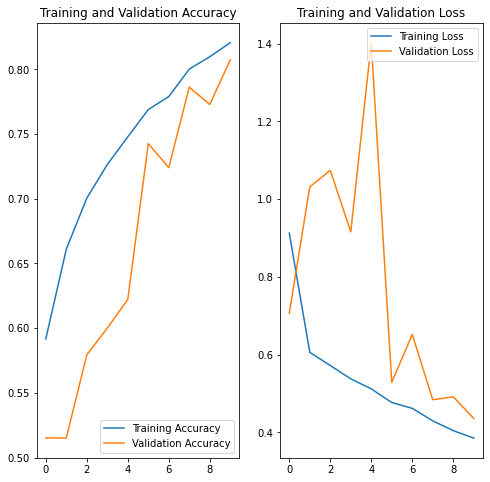

In [43]:
# Visualizing results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Predictions using test set

In [91]:
import cv2

In [81]:
test_filenames = os.listdir(TEST_DIR)
test_df = pd.DataFrame({
    'filename': test_filenames
})

In [82]:
test_df.head()

filename
0      1.jpg
1     10.jpg
2    100.jpg
3   1000.jpg
4  10000.jpg

In [83]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  12500 non-null  object
dtypes: object(1)
memory usage: 97.8+ KB


In [92]:
testing_data = []
for img in os.listdir(TEST_DIR):
    test_path = os.path.join(TEST_DIR,img)
    img_num = img.split('.')[0]
    img = cv2.imread(test_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_rgb = cv2.resize(img_rgb,IMG_SIZE)
    testing_data.append([np.array(img_rgb),img_num])

In [131]:
testing_reshaped = np.array([i[0] for i in testing_data]).reshape(-1,IMG_WIDTH,IMG_HEIGHT,3)/255

In [132]:
testing_reshaped

array([[[[0.15294118, 0.25882353, 0.37647059],
         [0.14509804, 0.24705882, 0.38431373],
         [0.16078431, 0.2627451 , 0.40784314],
         ...,
         [0.32156863, 0.45098039, 0.83529412],
         [0.30196078, 0.44313725, 0.81176471],
         [0.18431373, 0.33333333, 0.67843137]],

        [[0.16470588, 0.27058824, 0.38823529],
         [0.14117647, 0.24313725, 0.38039216],
         [0.12941176, 0.23137255, 0.37647059],
         ...,
         [0.3254902 , 0.44313725, 0.83137255],
         [0.30196078, 0.42745098, 0.8       ],
         [0.18823529, 0.32156863, 0.67058824]],

        [[0.15686275, 0.2627451 , 0.38039216],
         [0.11764706, 0.21960784, 0.35686275],
         [0.15686275, 0.25882353, 0.40392157],
         ...,
         [0.34117647, 0.43921569, 0.83529412],
         [0.3254902 , 0.42745098, 0.81176471],
         [0.20392157, 0.31764706, 0.68235294]],

        ...,

        [[0.69803922, 0.71372549, 0.75686275],
         [0.71764706, 0.73333333, 0.78039216]

In [133]:
nb_samples = test_df.shape[0]

In [134]:
predict = model3.predict_generator(testing_reshaped, steps=np.ceil(nb_samples/BATCH_SIZE))

In [135]:
predict.shape

(12500, 2)

In [136]:
predict

array([[0.0236593 , 0.9763407 ],
       [0.9987238 , 0.00127619],
       [0.51556146, 0.48443857],
       ...,
       [0.00952366, 0.99047637],
       [0.9925247 , 0.00747533],
       [0.13128157, 0.8687185 ]], dtype=float32)

In [138]:
test_df['category'] = np.argmax(predict, axis=-1)

In [139]:
test_df

filename  category
0          1.jpg         1
1         10.jpg         0
2        100.jpg         0
3       1000.jpg         1
4      10000.jpg         1
...          ...       ...
12495   9995.jpg         0
12496   9996.jpg         1
12497   9997.jpg         1
12498   9998.jpg         0
12499   9999.jpg         1

[12500 rows x 2 columns]

In [140]:
test_df['category'] = test_df['category'].replace({1:'dog',0:'cat'})

In [141]:
test_df

filename category
0          1.jpg      dog
1         10.jpg      cat
2        100.jpg      cat
3       1000.jpg      dog
4      10000.jpg      dog
...          ...      ...
12495   9995.jpg      cat
12496   9996.jpg      dog
12497   9997.jpg      dog
12498   9998.jpg      cat
12499   9999.jpg      dog

[12500 rows x 2 columns]

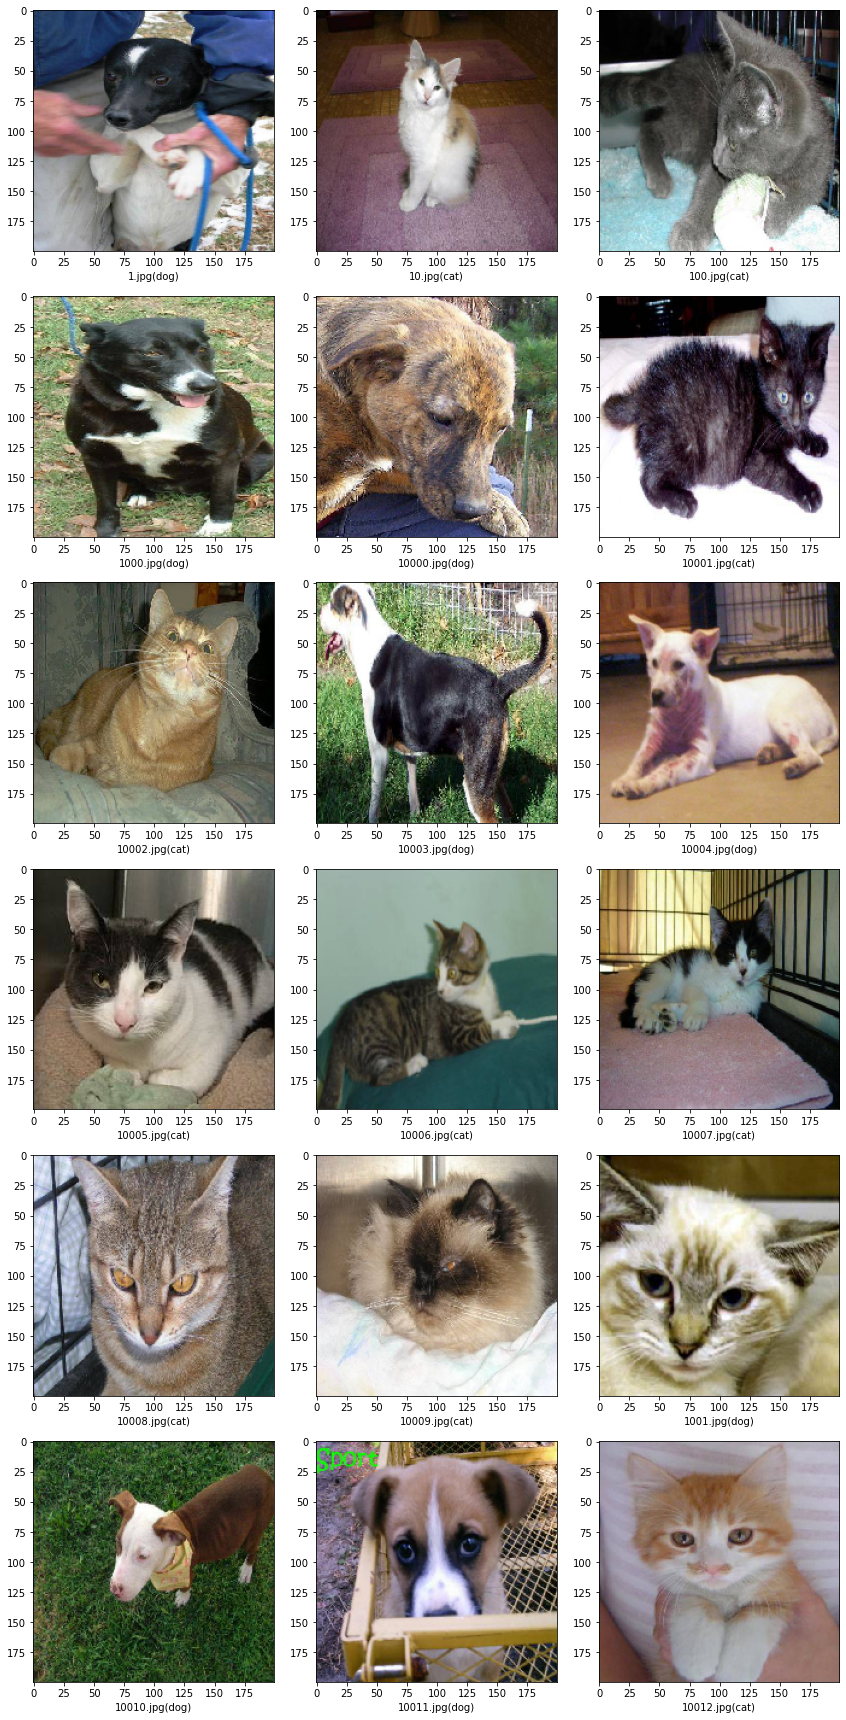

In [143]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("test/test/"+filename, target_size=IMG_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

# Looks pretty good, only 1/18 misclassified in this sample!

# Let's submit our predictions

In [156]:
test_df['filename'] = test_df['filename'].apply(lambda x: int(x.split('.')[0]))
test_df['category'] = test_df['category'].replace({'dog':1,'cat':0})

In [160]:
test_df.rename(columns={'filename':'id', 'category':'label'},inplace=True)

In [162]:
test_df.sort_values(by=['id'],inplace=True)

In [163]:
test_df

id  label
0         1      1
3612      2      1
4723      3      1
5834      4      1
6945      5      0
...     ...    ...
2775  12496      0
2776  12497      0
2777  12498      1
2778  12499      1
2781  12500      0

[12500 rows x 2 columns]

In [164]:
test_df.to_csv('submission.csv',index=False)

# Thanks for making it this far!